# Bike Sharing Assignment

## Objective:

The company wants:
- To identify which features are significant in predicting the demand for shared bikes.
- To understand how well those variables describe the bike demands
- The aim is to create a linear model that predicts the demand for us on any given day. It will, in turn, help the company to manage the demand for their bikes and fulfill customer expectations leading to increase in their revenue.

## Step 1: Reading and Understanding the data:

Here we import all the libraries essential in reading the data and performing our analysis.

In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [501]:
#read the data
bikes = pd.read_csv('day.csv')

In [502]:
#reading first few rows
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [503]:
bikes.shape

(730, 16)

In [504]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can observe that there are no null values in any columns .

In [505]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In the given dataset, the continuous variables are: temp ,atemp ,hum ,windspeed ,casual	,registered	and cnt.
Rest all are categorical variables.

### Step 2: Visualising the Data:

### Visualising Continuous Variables:

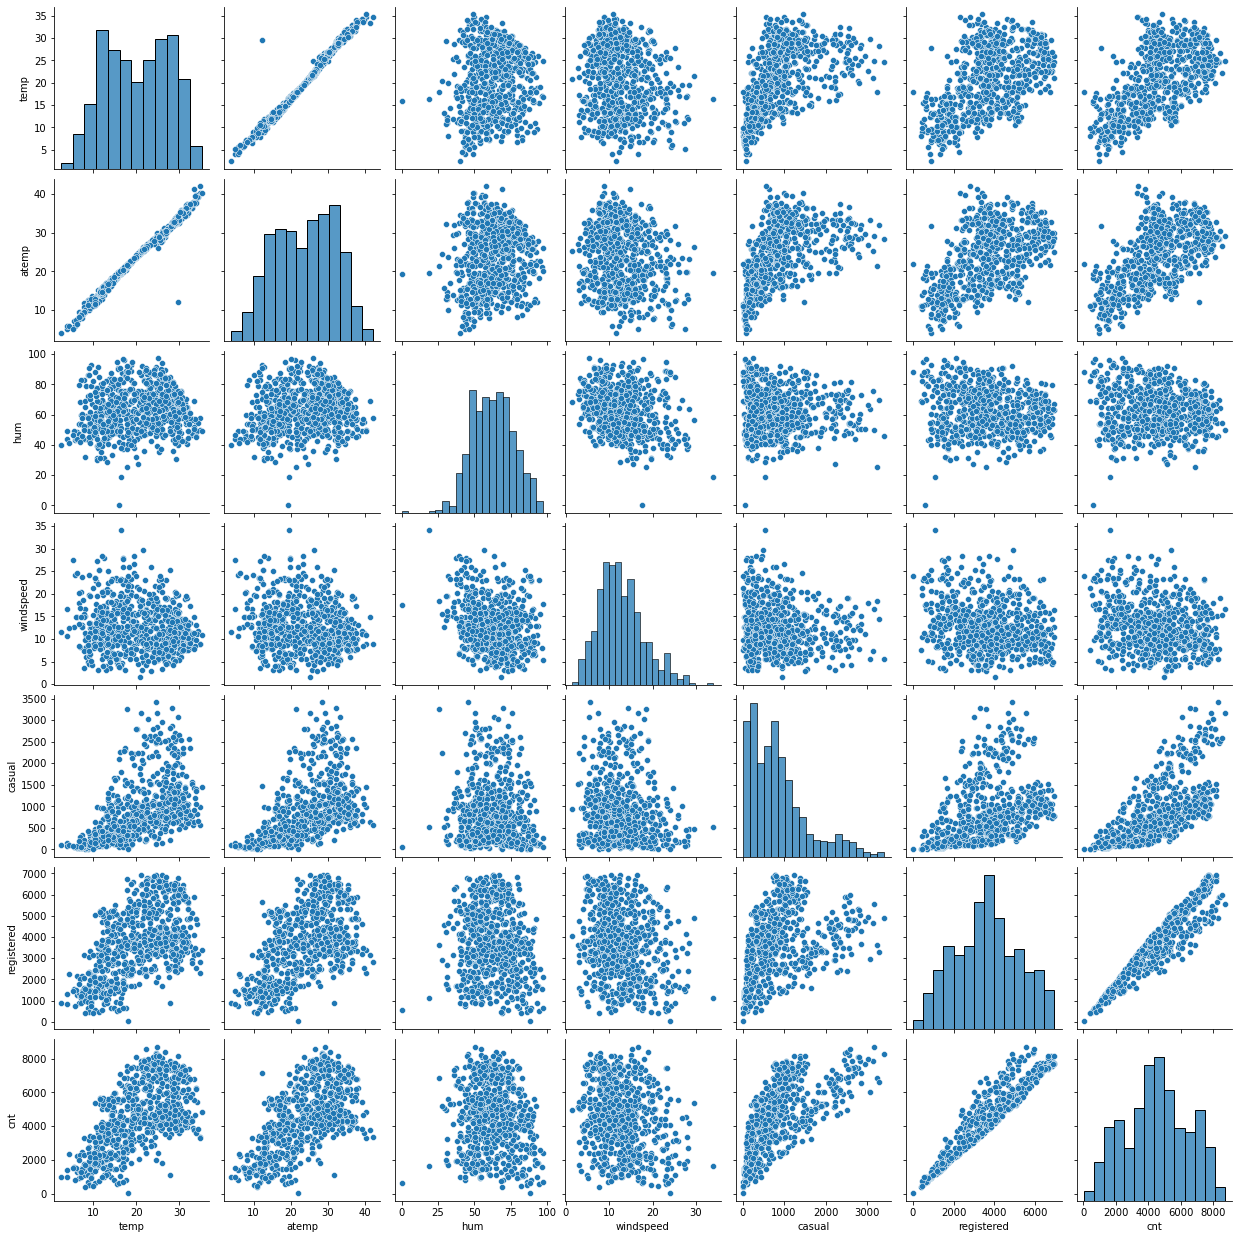

In [506]:
# Visualising Continuous variables
varlist = ['temp' ,'atemp' ,'hum' ,'windspeed' ,'casual','registered','cnt']
sns.pairplot(bikes[varlist])
plt.show()

**Observations:**
- From the pairplots, it is evident that the variables casual and registered with cnt are having very strong positive correlation. 
- The variables temp and atemp are very strongly correlated with each other and have a strong positive correlation with cnt. 
- Humidity and windspeed follow a more scattered pattern having slightly negative correlation with cnt.

### Visualising Categorical Variables:

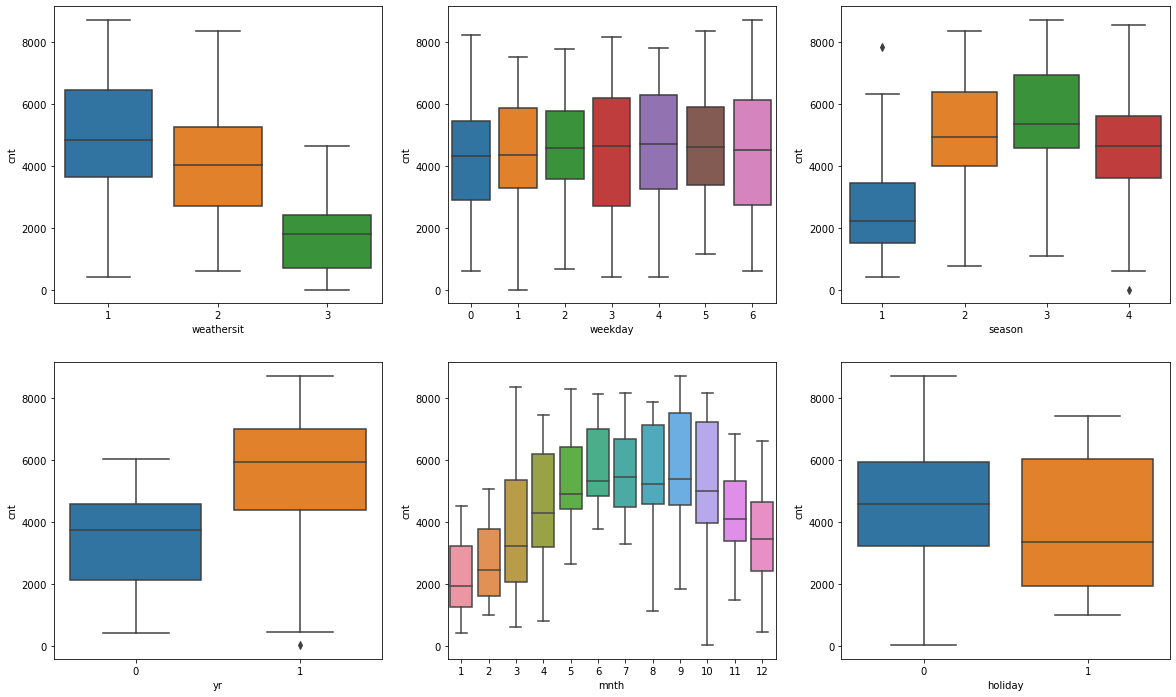

In [507]:
# Visualising Categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= 'weathersit',y='cnt',data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.subplot(2,3,3)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(2,3,4)
sns.boxplot(x='yr',y='cnt',data=bikes)
plt.subplot(2,3,5)
sns.boxplot(x='mnth',y='cnt',data=bikes)
plt.subplot(2,3,6)
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.show()

**Observations:**
1. Count of bikes hired are greatest in clear weather followed by misty weather. The least number of bikes are hired in light snow. There are 0 bikes hired when there is heavy rain.
2. The median values of bikes hired on weekdays is almost the same. Howevwer the maximum of the bikes hired is on weekday_6.
3. Least number of bikes are hired in spring and maximum is during fall seasons.
4. Number of bikes hired was far greater in 2019 as compared to 2018.
5. Month when the demand of bikes is the highest is in September and it is lowest in the month of January.
6. Overall distribution of bikes rented on holidays is lower than the working days.

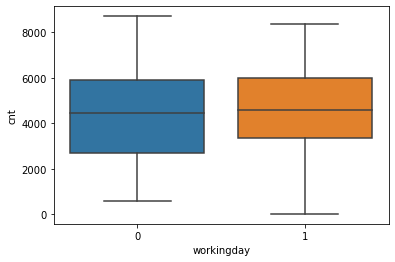

In [508]:
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.show()

**Observation:** The median for both working days and non-working days are the same. But the max. number of bikes hired are on non-working days.

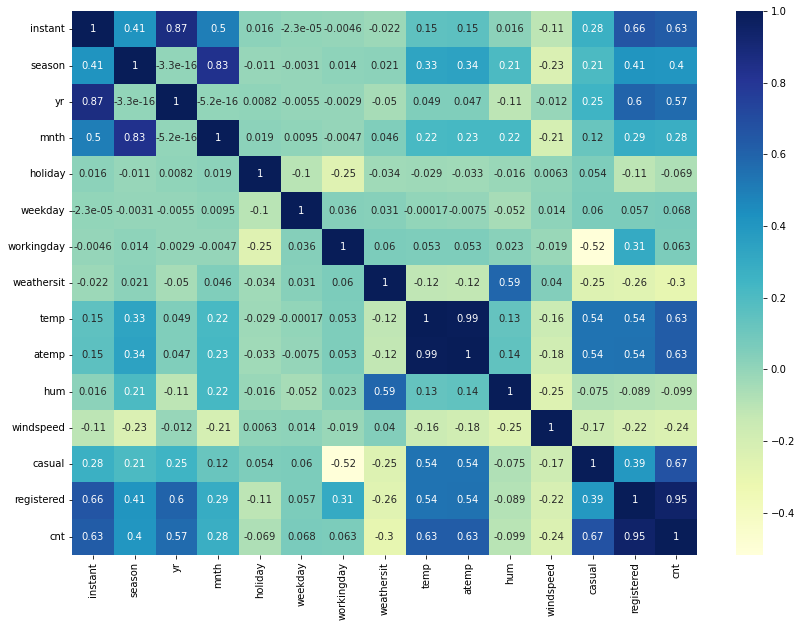

In [509]:
# Checking correlation
plt.figure(figsize=(14,10))
sns.heatmap(bikes.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations:**
- We can observe very high correlations between (temp,atemp),(registered,cnt),(instant,yr) and (mnth,season). 
- Most of the variables are having positively correlated with each other.

## Step 3: Preparing data for modelling:

Dropping unnecessary Columns:

Here we drop the columns temp, casual and registered as they have high correlations with other columns. Also, instant and dteday is not necessary for our analysis and thus, removed.

In [510]:
var = ['instant','dteday','casual','registered','temp']
bikes = bikes.drop(var,axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


Encoding Categorical Variables:

Mapping values of season as 1:spring, 2:summer, 3:fall and 4:winter

In [511]:
bikes[['season']] = bikes[['season']].apply( lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bikes['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

Mapping values of weathersit to 1:Clear, 2:Misty, 3:Light Snow and 4:Heavy Rain

In [512]:
bikes[['weathersit']] = bikes[['weathersit']].apply( lambda x: x.map({1:'Clear', 2:'Misty', 3:'Light Snow', 4:'Heavy Rain'}))
bikes['weathersit'].head()

0    Misty
1    Misty
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

Mapping values of year to 0: 2018 and 1:2019

In [513]:
bikes[['yr']] = bikes[['yr']].apply( lambda x: x.map({0: 2018, 1:2019}))
bikes['yr'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: yr, dtype: int64

Mapping the names of months to their respective numerical values

In [514]:
bikes[['mnth']] = bikes[['mnth']].apply( lambda x: x.map({1:'Jan', 2:'Feb',3:'Mar' ,4:'Apr' ,5:'May' ,6:'Jun' ,7:'Jul' ,8:'Aug' ,9:'Sep' ,10:'Oct' ,11:'Nov' ,12:'Dec'}))
bikes['mnth'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

### Creation of Dummy Variables:

In [515]:
# Creating dummy variables for season
season = pd.get_dummies(bikes['season'],drop_first=True)
# concat the dummy df with the original one
bikes = pd.concat([bikes,season],axis=1)
# drop season variable
bikes = bikes.drop(['season'],axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,2018,Jan,0,6,0,Misty,18.18125,80.5833,10.749882,985,1,0,0
1,2018,Jan,0,0,0,Misty,17.68695,69.6087,16.652113,801,1,0,0
2,2018,Jan,0,1,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,2018,Jan,0,2,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,2018,Jan,0,3,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [516]:
# Creating dummy variables for weathersit
weathersit = pd.get_dummies(bikes['weathersit'],drop_first=True)
# concat the dummy df with the original one
bikes = pd.concat([bikes,weathersit],axis=1)
# drop weathersit variable
bikes = bikes.drop(['weathersit'],axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty
0,2018,Jan,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018,Jan,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018,Jan,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018,Jan,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018,Jan,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [517]:
# Creating dummy variables for year
yr = pd.get_dummies(bikes['yr'],drop_first=True)
# concat the dummy df with the original one
bikes = pd.concat([bikes,yr],axis=1)
# drop year variable
bikes = bikes.drop(['yr'],axis=1)
bikes.head()

,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,2019
0,Jan,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,Jan,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,Jan,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,Jan,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0
4,Jan,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0


In [518]:
# Creating dummy variables for month
mnth = pd.get_dummies(bikes['mnth'],drop_first=True)
# concat the dummy df with the original one
bikes = pd.concat([bikes,mnth],axis=1)
# drop month variable
bikes = bikes.drop(['mnth'],axis=1)
bikes.head()

,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [519]:
# Creating dummy variables for weekday
weekday = pd.get_dummies(bikes['weekday'],prefix='weekday',drop_first=True)
# concat the dummy df with the original one
bikes = pd.concat([bikes,weekday],axis=1)
# drop weekday variable
bikes = bikes.drop(['weekday'],axis=1)
bikes.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Visualising of correlations after adding the dummy variables:

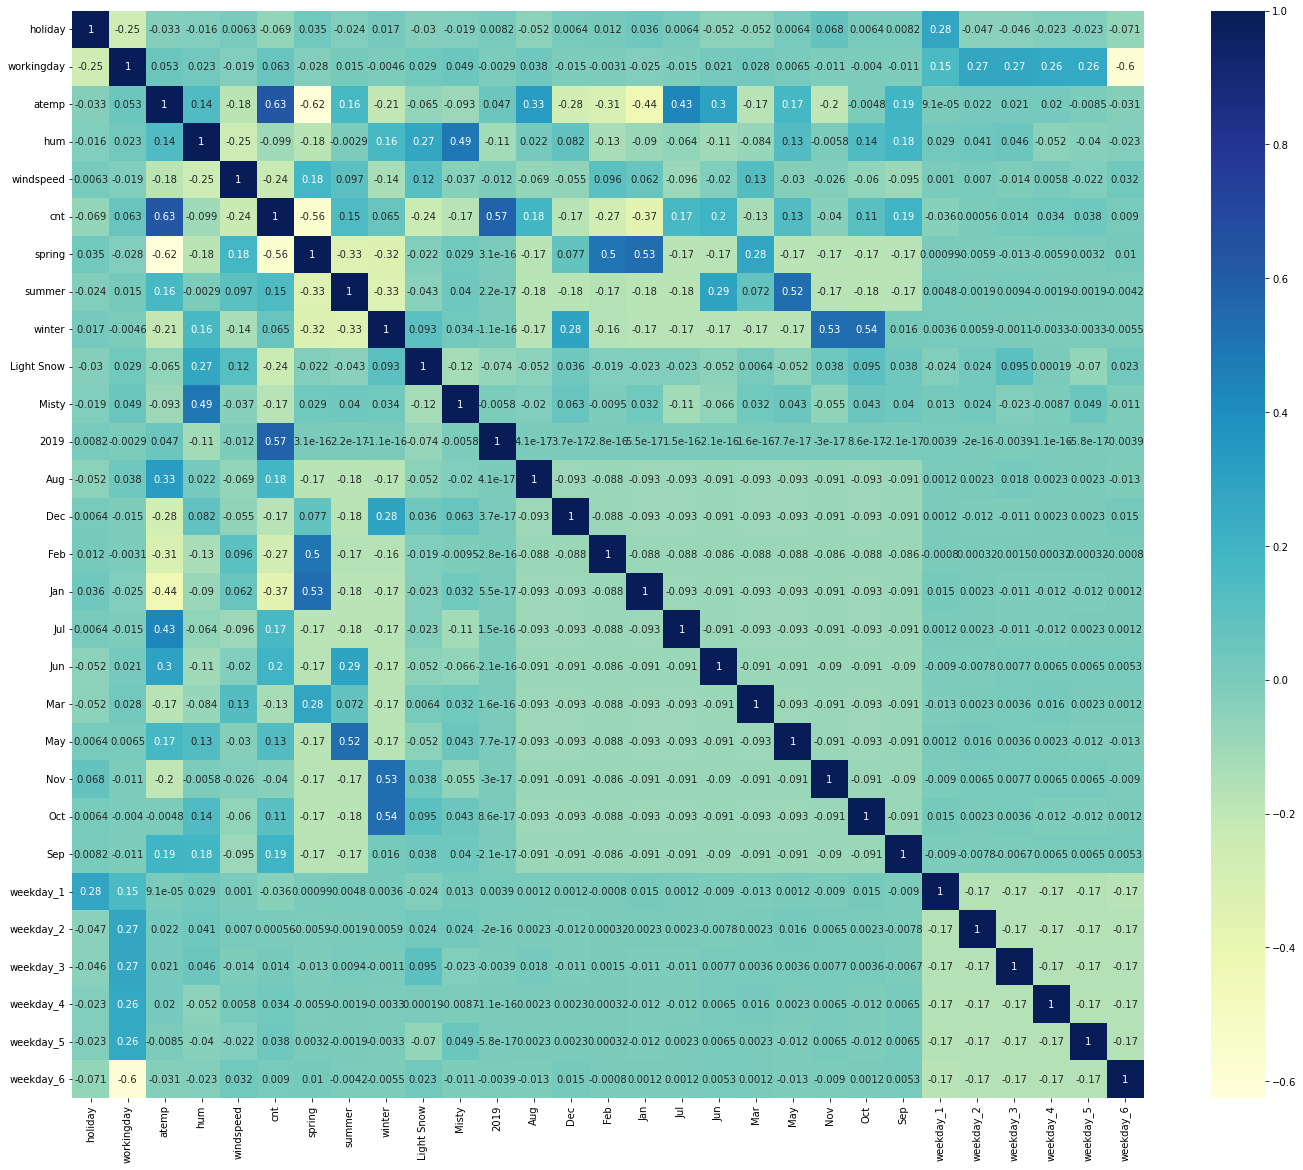

In [520]:
# Checking correlation
plt.figure(figsize=(24,20))
sns.heatmap(bikes.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations:** We can check the correlations of the variables including numerical and categorical (as well as dummy) with the help of this diagram.There are also negative correlation observed in some features. But overall, there isn't very high correlations among the variables.

## Step 4: Splitting into train and test set:

In [521]:
#imporing required libraries
import sklearn
from sklearn.model_selection import train_test_split

In [522]:
df_train, df_test = train_test_split(bikes,train_size = 0.7, random_state = 100)

In [523]:
df_train.shape

(510, 29)

In [524]:
df_test.shape

(220, 29)

### Rescaling the features

Here we will be using Min-Max Scaling so that the values of all the features lies between 0 and 1.

In [525]:
#Importing required libraries
from sklearn.preprocessing import MinMaxScaler

#1. Instantiate an object
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

#2. Fit and transform on training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [526]:
df_train.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

Assigning the target variable 'cnt' from dataset to y-axis and keeping rest of the dependent variables on x-axis

In [527]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building the Model:

In [528]:
bikes.columns

Index([   'holiday', 'workingday',      'atemp',        'hum',  'windspeed',
              'cnt',     'spring',     'summer',     'winter', 'Light Snow',
            'Misty',         2019,        'Aug',        'Dec',        'Feb',
              'Jan',        'Jul',        'Jun',        'Mar',        'May',
              'Nov',        'Oct',        'Sep',  'weekday_1',  'weekday_2',
        'weekday_3',  'weekday_4',  'weekday_5',  'weekday_6'],
      dtype='object')

In [529]:
# Importing relevant libraries
import statsmodels.api as sm

Creating a LR model with all the variables...

In [530]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.07e-179
Time:                        06:42:51   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3011      0.044      6.798      0.000       0.214       0.388
holiday       -0.0358      0.024     -1.509      0.132      -0.082       0.011
workingday     0.0434      0.009      4.594      0.000       0.025       0.062
atemp          0.4160      0.045      9.174      0.000       0.327       0.505
hum           -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed     -0.1683      0.026     -6.488      0.000      -0.219      -0.117
spring        -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer         0.0348      0.026      1.327      0.185      -0.017       0.086
winter         0.1015      0.028      3.612      0.000       0.046       0.157
Light Snow    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
Misty         -0.0612      0.010     -5.830      0.000      -0.082      -0.041
2019           0.2344      0.008     28.934      0.000       0.218       0.250
Aug            0.0419      0.033      1.257      0.209      -0.024       0.107
Dec           -0.0526      0.034     -1.560      0.120      -0.119       0.014
Feb           -0.0404      0.033     -1.221      0.223      -0.105       0.025
Jan           -0.0736      0.034     -2.188      0.029      -0.140      -0.007
Jul           -0.0147      0.035     -0.424      0.672      -0.083       0.053
Jun            0.0242      0.024      1.000      0.318      -0.023       0.072
Mar           -0.0003      0.025     -0.014      0.989      -0.049       0.048
May            0.0363      0.021      1.734      0.084      -0.005       0.077
Nov           -0.0457      0.037     -1.249      0.212      -0.118       0.026
Oct            0.0076      0.036      0.210      0.833      -0.063       0.079
Sep            0.0957      0.032      2.984      0.003       0.033       0.159
weekday_1     -0.0110      0.010     -1.121      0.263      -0.030       0.008
weekday_2     -0.0061      0.011     -0.542      0.588      -0.028       0.016
weekday_3      0.0071      0.011      0.671      0.502      -0.014       0.028
weekday_4      0.0022      0.011      0.201      0.841      -0.019       0.024
weekday_5      0.0153      0.011      1.363      0.174      -0.007       0.037
weekday_6      0.0544      0.015      3.716      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     1.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### Checking VIF:

To understand how the features are correlated with each other, we will be using Variance Inflation Factor or VIF. It is given by:
### $ VIF_i = \frac{1}{1 - {R_i}^2} $
We generally consider VIF < 5.

In [531]:
# importing required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
1,workingday,inf
3,hum,36.92
2,atemp,32.85
5,spring,11.76


The features workingday, holiday, weekday__5, weekday__4, weekday__3, weekday__2, weekday__1 are having infinity VIF values, suggesting they are strongly correlated.

We could have:
- High p-value and high VIF
- High-low:
    - High p, Low VIF : remove these first
    - Low p, High VIF : remove these after the ones above
- Low p, Low VIF : keep these as they have low correlation

### Model 1
#### Dropping a variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'Mar' having p-value = 0.989 . Let's drop that variable.

In [532]:
X1 = X_train.drop('Mar',axis=1)

In [533]:
# Create another model
X_train_sm = sm.add_constant(X1)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.03e-180
Time:                        06:42:51   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     483   BIC:                            -878.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3009      0.042      7.237      0.000       0.219       0.383
holiday       -0.0358      0.024     -1.511      0.132      -0.082       0.011
workingday     0.0434      0.009      4.605      0.000       0.025       0.062
atemp          0.4161      0.045      9.312      0.000       0.328       0.504
hum           -0.1459      0.039     -3.778      0.000      -0.222      -0.070
windspeed     -0.1683      0.026     -6.507      0.000      -0.219      -0.117
spring        -0.0521      0.028     -1.829      0.068      -0.108       0.004
summer         0.0349      0.026      1.356      0.176      -0.016       0.085
winter         0.1014      0.028      3.679      0.000       0.047       0.156
Light Snow    -0.2530      0.027     -9.506      0.000      -0.305      -0.201
Misty         -0.0612      0.010     -5.836      0.000      -0.082      -0.041
2019           0.2344      0.008     28.964      0.000       0.218       0.250
Aug            0.0420      0.031      1.348      0.178      -0.019       0.103
Dec           -0.0523      0.026     -2.008      0.045      -0.104      -0.001
Feb           -0.0400      0.022     -1.791      0.074      -0.084       0.004
Jan           -0.0732      0.022     -3.285      0.001      -0.117      -0.029
Jul           -0.0145      0.033     -0.443      0.658      -0.079       0.050
Jun            0.0243      0.023      1.071      0.285      -0.020       0.069
May            0.0364      0.019      1.869      0.062      -0.002       0.075
Nov           -0.0454      0.031     -1.468      0.143      -0.106       0.015
Oct            0.0079      0.031      0.255      0.799      -0.053       0.069
Sep            0.0958      0.029      3.308      0.001       0.039       0.153
weekday_1     -0.0110      0.010     -1.123      0.262      -0.030       0.008
weekday_2     -0.0061      0.011     -0.543      0.588      -0.028       0.016
weekday_3      0.0071      0.011      0.672      0.502      -0.014       0.028
weekday_4      0.0022      0.011      0.201      0.841      -0.019       0.024
weekday_5      0.0153      0.011      1.365      0.173      -0.007       0.037
weekday_6      0.0544      0.015      3.722      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.568   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.381
Skew:                          -0.787   Prob(JB):                     7.82e-57
Kurtosis:                       6.111   Cond. No.                     1.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.06e-28. This might indicate

In [534]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
25,weekday_5,inf
21,weekday_1,inf
24,weekday_4,inf
1,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
3,hum,34.84
2,atemp,32.84
7,winter,10.58


### Model 2
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and high VIF. One such variable is 'weekday_4' having p-value = 0.841 . Let's drop that variable.

In [535]:
X2 = X1.drop('weekday_4',axis=1)

In [536]:
# Create another model
X_train_sm = sm.add_constant(X2)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.03e-180
Time:                        06:42:51   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     483   BIC:                            -878.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3009      0.042      7.237      0.000       0.219       0.383
holiday       -0.0336      0.030     -1.115      0.265      -0.093       0.026
workingday     0.0456      0.015      2.993      0.003       0.016       0.075
atemp          0.4161      0.045      9.312      0.000       0.328       0.504
hum           -0.1459      0.039     -3.778      0.000      -0.222      -0.070
windspeed     -0.1683      0.026     -6.507      0.000      -0.219      -0.117
spring        -0.0521      0.028     -1.829      0.068      -0.108       0.004
summer         0.0349      0.026      1.356      0.176      -0.016       0.085
winter         0.1014      0.028      3.679      0.000       0.047       0.156
Light Snow    -0.2530      0.027     -9.506      0.000      -0.305      -0.201
Misty         -0.0612      0.010     -5.836      0.000      -0.082      -0.041
2019           0.2344      0.008     28.964      0.000       0.218       0.250
Aug            0.0420      0.031      1.348      0.178      -0.019       0.103
Dec           -0.0523      0.026     -2.008      0.045      -0.104      -0.001
Feb           -0.0400      0.022     -1.791      0.074      -0.084       0.004
Jan           -0.0732      0.022     -3.285      0.001      -0.117      -0.029
Jul           -0.0145      0.033     -0.443      0.658      -0.079       0.050
Jun            0.0243      0.023      1.071      0.285      -0.020       0.069
May            0.0364      0.019      1.869      0.062      -0.002       0.075
Nov           -0.0454      0.031     -1.468      0.143      -0.106       0.015
Oct            0.0079      0.031      0.255      0.799      -0.053       0.069
Sep            0.0958      0.029      3.308      0.001       0.039       0.153
weekday_1     -0.0132      0.015     -0.867      0.386      -0.043       0.017
weekday_2     -0.0083      0.016     -0.535      0.593      -0.039       0.022
weekday_3      0.0049      0.015      0.332      0.740      -0.024       0.034
weekday_5      0.0131      0.016      0.837      0.403      -0.018       0.044
weekday_6      0.0544      0.015      3.722      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.568   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.381
Skew:                          -0.787   Prob(JB):                     7.82e-57
Kurtosis:                       6.111   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [537]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.84
2,atemp,32.84
7,winter,10.58
1,workingday,9.61
5,spring,8.30
6,summer,6.92
11,Aug,5.13
19,Oct,4.96
4,windspeed,4.91
18,Nov,4.85


### Model 3
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and high VIF. Another such variable is 'Oct' having p-value = 0.799. Let's drop that variable.

In [538]:
X3 = X2.drop('Oct',axis=1)

In [539]:
# Create another model
X_train_sm = sm.add_constant(X3)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.00e-181
Time:                        06:42:51   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     484   BIC:                            -884.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.041      7.441      0.000       0.223       0.383
holiday       -0.0332      0.030     -1.104      0.270      -0.092       0.026
workingday     0.0454      0.015      2.989      0.003       0.016       0.075
atemp          0.4168      0.045      9.352      0.000       0.329       0.504
hum           -0.1450      0.038     -3.774      0.000      -0.221      -0.070
windspeed     -0.1680      0.026     -6.508      0.000      -0.219      -0.117
spring        -0.0536      0.028     -1.924      0.055      -0.108       0.001
summer         0.0324      0.024      1.364      0.173      -0.014       0.079
winter         0.1047      0.024      4.301      0.000       0.057       0.153
Light Snow    -0.2528      0.027     -9.512      0.000      -0.305      -0.201
Misty         -0.0612      0.010     -5.850      0.000      -0.082      -0.041
2019           0.2343      0.008     29.010      0.000       0.218       0.250
Aug            0.0389      0.029      1.357      0.175      -0.017       0.095
Dec           -0.0570      0.018     -3.108      0.002      -0.093      -0.021
Feb           -0.0413      0.022     -1.902      0.058      -0.084       0.001
Jan           -0.0744      0.022     -3.427      0.001      -0.117      -0.032
Jul           -0.0177      0.030     -0.580      0.562      -0.077       0.042
Jun            0.0229      0.022      1.041      0.298      -0.020       0.066
May            0.0358      0.019      1.854      0.064      -0.002       0.074
Nov           -0.0516      0.019     -2.709      0.007      -0.089      -0.014
Sep            0.0920      0.025      3.722      0.000       0.043       0.141
weekday_1     -0.0132      0.015     -0.870      0.385      -0.043       0.017
weekday_2     -0.0083      0.015     -0.536      0.592      -0.039       0.022
weekday_3      0.0049      0.015      0.334      0.738      -0.024       0.034
weekday_5      0.0131      0.016      0.841      0.401      -0.018       0.044
weekday_6      0.0543      0.015      3.722      0.000       0.026       0.083
==============================================================================
Omnibus:                       84.681   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.521
Skew:                          -0.782   Prob(JB):                     8.89e-56
Kurtosis:                       6.080   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [540]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.43
2,atemp,32.05
1,workingday,9.61
5,spring,8.20
7,winter,6.97
6,summer,6.13
4,windspeed,4.84
11,Aug,4.51
15,Jul,4.15
19,Sep,2.82


### Model 4
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. Another such variable is 'weekday_3' having p-value = 0.738. Let's drop that variable.

In [541]:
X4 = X3.drop('weekday_3',axis=1)

In [542]:
# Create another model
X_train_sm = sm.add_constant(X4)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 14 May 2022   Prob (F-statistic):          9.80e-183
Time:                        06:42:51   Log-Likelihood:                 523.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     485   BIC:                            -890.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3025      0.041      7.441      0.000       0.223       0.382
holiday       -0.0309      0.029     -1.056      0.291      -0.088       0.027
workingday     0.0481      0.013      3.737      0.000       0.023       0.073
atemp          0.4166      0.045      9.356      0.000       0.329       0.504
hum           -0.1446      0.038     -3.769      0.000      -0.220      -0.069
windspeed     -0.1681      0.026     -6.515      0.000      -0.219      -0.117
spring        -0.0534      0.028     -1.920      0.055      -0.108       0.001
summer         0.0326      0.024      1.376      0.170      -0.014       0.079
winter         0.1050      0.024      4.320      0.000       0.057       0.153
Light Snow    -0.2527      0.027     -9.517      0.000      -0.305      -0.201
Misty         -0.0612      0.010     -5.853      0.000      -0.082      -0.041
2019           0.2343      0.008     29.040      0.000       0.218       0.250
Aug            0.0392      0.029      1.368      0.172      -0.017       0.096
Dec           -0.0573      0.018     -3.127      0.002      -0.093      -0.021
Feb           -0.0412      0.022     -1.897      0.058      -0.084       0.001
Jan           -0.0744      0.022     -3.430      0.001      -0.117      -0.032
Jul           -0.0174      0.030     -0.572      0.568      -0.077       0.042
Jun            0.0232      0.022      1.055      0.292      -0.020       0.066
May            0.0360      0.019      1.864      0.063      -0.002       0.074
Nov           -0.0518      0.019     -2.723      0.007      -0.089      -0.014
Sep            0.0922      0.025      3.732      0.000       0.044       0.141
weekday_1     -0.0159      0.013     -1.223      0.222      -0.041       0.010
weekday_2     -0.0110      0.013     -0.833      0.405      -0.037       0.015
weekday_5      0.0105      0.013      0.781      0.435      -0.016       0.037
weekday_6      0.0543      0.015      3.726      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.183   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.733
Skew:                          -0.786   Prob(JB):                     2.94e-56
Kurtosis:                       6.093   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [543]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.41
2,atemp,32.02
5,spring,8.20
7,winter,6.96
1,workingday,6.85
6,summer,6.13
4,windspeed,4.84
11,Aug,4.51
15,Jul,4.15
19,Sep,2.82


### Model 5
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF.Another such variable is 'Jul' having p-value = 0.568. Let's drop that variable.

In [544]:
X5 = X4.drop('Jul',axis=1)

In [545]:
# Create another model
X_train_sm = sm.add_constant(X5)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.04e-183
Time:                        06:42:51   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     486   BIC:                            -896.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2955      0.039      7.625      0.000       0.219       0.372
holiday       -0.0298      0.029     -1.022      0.307      -0.087       0.028
workingday     0.0485      0.013      3.769      0.000       0.023       0.074
atemp          0.4067      0.041      9.927      0.000       0.326       0.487
hum           -0.1428      0.038     -3.737      0.000      -0.218      -0.068
windspeed     -0.1673      0.026     -6.499      0.000      -0.218      -0.117
spring        -0.0441      0.023     -1.952      0.052      -0.089       0.000
summer         0.0412      0.018      2.236      0.026       0.005       0.077
winter         0.1140      0.019      6.164      0.000       0.078       0.150
Light Snow    -0.2528      0.027     -9.528      0.000      -0.305      -0.201
Misty         -0.0614      0.010     -5.881      0.000      -0.082      -0.041
2019           0.2345      0.008     29.112      0.000       0.219       0.250
Aug            0.0520      0.018      2.922      0.004       0.017       0.087
Dec           -0.0577      0.018     -3.152      0.002      -0.094      -0.022
Feb           -0.0422      0.022     -1.953      0.051      -0.085       0.000
Jan           -0.0762      0.021     -3.546      0.000      -0.118      -0.034
Jun            0.0304      0.018      1.699      0.090      -0.005       0.066
May            0.0390      0.019      2.101      0.036       0.003       0.075
Nov           -0.0517      0.019     -2.717      0.007      -0.089      -0.014
Sep            0.1021      0.018      5.790      0.000       0.067       0.137
weekday_1     -0.0160      0.013     -1.238      0.216      -0.042       0.009
weekday_2     -0.0113      0.013     -0.856      0.393      -0.037       0.015
weekday_5      0.0102      0.013      0.763      0.446      -0.016       0.037
weekday_6      0.0542      0.015      3.718      0.000       0.026       0.083
==============================================================================
Omnibus:                       86.013   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.548
Skew:                          -0.792   Prob(JB):                     4.36e-57
Kurtosis:                       6.116   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [546]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.28
2,atemp,20.31
1,workingday,6.85
5,spring,5.95
4,windspeed,4.81
7,winter,4.43
6,summer,4.04
14,Jan,2.41
9,Misty,2.34
10,2019,2.12


### Model 6
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'weekday_5' having p-value = 0.446. Let's drop that variable.

In [547]:
X6 = X5.drop('weekday_5',axis=1)

In [548]:
# Create another model
X_train_sm = sm.add_constant(X6)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.22e-184
Time:                        06:42:51   Log-Likelihood:                 522.64
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     487   BIC:                            -901.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2971      0.039      7.679      0.000       0.221       0.373
holiday       -0.0264      0.029     -0.916      0.360      -0.083       0.030
workingday     0.0516      0.012      4.234      0.000       0.028       0.076
atemp          0.4058      0.041      9.914      0.000       0.325       0.486
hum           -0.1436      0.038     -3.762      0.000      -0.219      -0.069
windspeed     -0.1674      0.026     -6.505      0.000      -0.218      -0.117
spring        -0.0449      0.023     -1.991      0.047      -0.089      -0.001
summer         0.0405      0.018      2.202      0.028       0.004       0.077
winter         0.1137      0.018      6.152      0.000       0.077       0.150
Light Snow    -0.2542      0.026     -9.610      0.000      -0.306      -0.202
Misty         -0.0608      0.010     -5.843      0.000      -0.081      -0.040
2019           0.2345      0.008     29.118      0.000       0.219       0.250
Aug            0.0518      0.018      2.909      0.004       0.017       0.087
Dec           -0.0579      0.018     -3.168      0.002      -0.094      -0.022
Feb           -0.0420      0.022     -1.944      0.052      -0.084       0.000
Jan           -0.0764      0.021     -3.557      0.000      -0.119      -0.034
Jun            0.0301      0.018      1.682      0.093      -0.005       0.065
May            0.0391      0.019      2.106      0.036       0.003       0.075
Nov           -0.0527      0.019     -2.779      0.006      -0.090      -0.015
Sep            0.1014      0.018      5.761      0.000       0.067       0.136
weekday_1     -0.0192      0.012     -1.564      0.119      -0.043       0.005
weekday_2     -0.0144      0.013     -1.153      0.250      -0.039       0.010
weekday_6      0.0542      0.015      3.719      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.209   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.234
Skew:                          -0.781   Prob(JB):                     5.11e-57
Kurtosis:                       6.124   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [549]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.28
2,atemp,20.31
1,workingday,6.06
5,spring,5.95
4,windspeed,4.81
7,winter,4.43
6,summer,4.04
14,Jan,2.41
9,Misty,2.33
10,2019,2.12


### Model 7
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'holiday' having p-value = 0.360. Let's drop that variable.

In [550]:
X7 = X6.drop('holiday',axis=1)

In [551]:
# Create another model
X_train_sm = sm.add_constant(X7)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.4
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.60e-185
Time:                        06:42:51   Log-Likelihood:                 522.20
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     488   BIC:                            -907.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2944      0.039      7.633      0.000       0.219       0.370
workingday     0.0559      0.011      4.991      0.000       0.034       0.078
atemp          0.4041      0.041      9.885      0.000       0.324       0.484
hum           -0.1425      0.038     -3.734      0.000      -0.217      -0.067
windspeed     -0.1675      0.026     -6.509      0.000      -0.218      -0.117
spring        -0.0458      0.023     -2.031      0.043      -0.090      -0.001
summer         0.0399      0.018      2.172      0.030       0.004       0.076
winter         0.1138      0.018      6.155      0.000       0.077       0.150
Light Snow    -0.2544      0.026     -9.618      0.000      -0.306      -0.202
Misty         -0.0608      0.010     -5.844      0.000      -0.081      -0.040
2019           0.2347      0.008     29.172      0.000       0.219       0.251
Aug            0.0516      0.018      2.899      0.004       0.017       0.087
Dec           -0.0587      0.018     -3.217      0.001      -0.095      -0.023
Feb           -0.0429      0.022     -1.986      0.048      -0.085      -0.000
Jan           -0.0772      0.021     -3.598      0.000      -0.119      -0.035
Jun            0.0307      0.018      1.714      0.087      -0.004       0.066
May            0.0393      0.019      2.122      0.034       0.003       0.076
Nov           -0.0551      0.019     -2.934      0.003      -0.092      -0.018
Sep            0.1000      0.018      5.703      0.000       0.066       0.134
weekday_1     -0.0230      0.012     -1.987      0.047      -0.046      -0.000
weekday_2     -0.0153      0.012     -1.228      0.220      -0.040       0.009
weekday_6      0.0576      0.014      4.101      0.000       0.030       0.085
==============================================================================
Omnibus:                       89.194   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.810
Skew:                          -0.811   Prob(JB):                     4.72e-61
Kurtosis:                       6.232   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [552]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,33.28
1,atemp,20.03
4,spring,5.90
0,workingday,5.16
3,windspeed,4.80
6,winter,4.42
5,summer,4.01
13,Jan,2.40
8,Misty,2.32
9,2019,2.12


### Model 8
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'weekday_2' having p-value = 0.220. Let's drop that variable.

In [553]:
X8 = X7.drop('weekday_2',axis=1)

In [554]:
# Create another model
X_train_sm = sm.add_constant(X8)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sat, 14 May 2022   Prob (F-statistic):          2.84e-186
Time:                        06:42:51   Log-Likelihood:                 521.41
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -911.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2954      0.039      7.657      0.000       0.220       0.371
workingday     0.0526      0.011      4.835      0.000       0.031       0.074
atemp          0.4028      0.041      9.850      0.000       0.322       0.483
hum           -0.1435      0.038     -3.761      0.000      -0.218      -0.069
windspeed     -0.1680      0.026     -6.526      0.000      -0.219      -0.117
spring        -0.0454      0.023     -2.012      0.045      -0.090      -0.001
summer         0.0396      0.018      2.158      0.031       0.004       0.076
winter         0.1136      0.018      6.140      0.000       0.077       0.150
Light Snow    -0.2526      0.026     -9.561      0.000      -0.305      -0.201
Misty         -0.0606      0.010     -5.821      0.000      -0.081      -0.040
2019           0.2347      0.008     29.162      0.000       0.219       0.251
Aug            0.0522      0.018      2.931      0.004       0.017       0.087
Dec           -0.0581      0.018     -3.182      0.002      -0.094      -0.022
Feb           -0.0443      0.022     -2.053      0.041      -0.087      -0.002
Jan           -0.0774      0.021     -3.608      0.000      -0.120      -0.035
Jun            0.0317      0.018      1.774      0.077      -0.003       0.067
May            0.0395      0.019      2.130      0.034       0.003       0.076
Nov           -0.0553      0.019     -2.942      0.003      -0.092      -0.018
Sep            0.1006      0.018      5.738      0.000       0.066       0.135
weekday_1     -0.0198      0.011     -1.756      0.080      -0.042       0.002
weekday_6      0.0578      0.014      4.112      0.000       0.030       0.085
==============================================================================
Omnibus:                       89.735   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.521
Skew:                          -0.805   Prob(JB):                     2.23e-63
Kurtosis:                       6.314   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [555]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,33.27
1,atemp,20.02
4,spring,5.89
0,workingday,4.85
3,windspeed,4.80
6,winter,4.42
5,summer,4.01
13,Jan,2.40
8,Misty,2.32
9,2019,2.12


### Model 9
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'weekday_1' having p-value = 0.080. Let's drop that variable.

In [556]:
X9 = X8.drop('weekday_1',axis=1)

In [557]:
# Create another model
X_train_sm = sm.add_constant(X9)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.07e-186
Time:                        06:42:51   Log-Likelihood:                 519.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2943      0.039      7.612      0.000       0.218       0.370
workingday     0.0509      0.011      4.689      0.000       0.030       0.072
atemp          0.4043      0.041      9.869      0.000       0.324       0.485
hum           -0.1460      0.038     -3.820      0.000      -0.221      -0.071
windspeed     -0.1686      0.026     -6.537      0.000      -0.219      -0.118
spring        -0.0445      0.023     -1.969      0.050      -0.089   -8.83e-05
summer         0.0394      0.018      2.141      0.033       0.003       0.076
winter         0.1130      0.019      6.098      0.000       0.077       0.149
Light Snow    -0.2513      0.026     -9.495      0.000      -0.303      -0.199
Misty         -0.0602      0.010     -5.769      0.000      -0.081      -0.040
2019           0.2340      0.008     29.048      0.000       0.218       0.250
Aug            0.0527      0.018      2.956      0.003       0.018       0.088
Dec           -0.0580      0.018     -3.168      0.002      -0.094      -0.022
Feb           -0.0447      0.022     -2.067      0.039      -0.087      -0.002
Jan           -0.0784      0.021     -3.648      0.000      -0.121      -0.036
Jun            0.0317      0.018      1.767      0.078      -0.004       0.067
May            0.0408      0.019      2.198      0.028       0.004       0.077
Nov           -0.0546      0.019     -2.901      0.004      -0.092      -0.018
Sep            0.1009      0.018      5.743      0.000       0.066       0.135
weekday_6      0.0600      0.014      4.276      0.000       0.032       0.088
==============================================================================
Omnibus:                       89.602   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.468
Skew:                          -0.799   Prob(JB):                     3.10e-64
Kurtosis:                       6.348   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [558]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,33.19
1,atemp,20.02
4,spring,5.89
0,workingday,4.81
3,windspeed,4.80
6,winter,4.42
5,summer,4.01
13,Jan,2.39
8,Misty,2.32
9,2019,2.11


### Model 10
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'Jun' having p-value = 0.078. Let's drop that variable.

In [559]:
X10 = X9.drop('Jun',axis=1)

In [560]:
# Create another model
X_train_sm = sm.add_constant(X10)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sat, 14 May 2022   Prob (F-statistic):          4.04e-187
Time:                        06:42:52   Log-Likelihood:                 518.19
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -917.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2877      0.039      7.460      0.000       0.212       0.363
workingday     0.0510      0.011      4.684      0.000       0.030       0.072
atemp          0.4285      0.039     11.072      0.000       0.352       0.505
hum           -0.1519      0.038     -3.982      0.000      -0.227      -0.077
windspeed     -0.1712      0.026     -6.635      0.000      -0.222      -0.121
spring        -0.0430      0.023     -1.900      0.058      -0.087       0.001
summer         0.0475      0.018      2.660      0.008       0.012       0.083
winter         0.1128      0.019      6.076      0.000       0.076       0.149
Light Snow    -0.2509      0.027     -9.458      0.000      -0.303      -0.199
Misty         -0.0597      0.010     -5.715      0.000      -0.080      -0.039
2019           0.2332      0.008     28.932      0.000       0.217       0.249
Aug            0.0462      0.017      2.641      0.009       0.012       0.081
Dec           -0.0548      0.018     -3.004      0.003      -0.091      -0.019
Feb           -0.0415      0.022     -1.925      0.055      -0.084       0.001
Jan           -0.0736      0.021     -3.446      0.001      -0.116      -0.032
May            0.0293      0.017      1.682      0.093      -0.005       0.064
Nov           -0.0523      0.019     -2.778      0.006      -0.089      -0.015
Sep            0.0966      0.017      5.542      0.000       0.062       0.131
weekday_6      0.0602      0.014      4.279      0.000       0.033       0.088
==============================================================================
Omnibus:                       88.355   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.836
Skew:                          -0.802   Prob(JB):                     1.27e-60
Kurtosis:                       6.226   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [561]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X10.values, i) for i in range(X10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.46
1,atemp,17.52
4,spring,5.89
0,workingday,4.81
3,windspeed,4.75
6,winter,4.41
5,summer,3.79
13,Jan,2.37
8,Misty,2.32
9,2019,2.10


### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high VIF. One such variable is 'hum' having VIF = 32.46. Let's drop that variable.

In [562]:
X11 = X10.drop('hum',axis=1)

In [563]:
# Create another model
X_train_sm = sm.add_constant(X11)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sat, 14 May 2022   Prob (F-statistic):          7.48e-185
Time:                        06:42:52   Log-Likelihood:                 510.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     492   BIC:                            -908.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2164      0.035      6.242      0.000       0.148       0.285
workingday     0.0538      0.011      4.879      0.000       0.032       0.075
atemp          0.3910      0.038     10.263      0.000       0.316       0.466
windspeed     -0.1459      0.025     -5.747      0.000      -0.196      -0.096
spring        -0.0529      0.023     -2.315      0.021      -0.098      -0.008
summer         0.0410      0.018      2.271      0.024       0.006       0.076
winter         0.0973      0.018      5.278      0.000       0.061       0.133
Light Snow    -0.2943      0.025    -11.993      0.000      -0.343      -0.246
Misty         -0.0835      0.009     -9.606      0.000      -0.101      -0.066
2019           0.2368      0.008     29.116      0.000       0.221       0.253
Aug            0.0402      0.018      2.275      0.023       0.005       0.075
Dec           -0.0620      0.018     -3.364      0.001      -0.098      -0.026
Feb           -0.0435      0.022     -1.985      0.048      -0.087      -0.000
Jan           -0.0805      0.022     -3.723      0.000      -0.123      -0.038
May            0.0204      0.018      1.161      0.246      -0.014       0.055
Nov           -0.0529      0.019     -2.769      0.006      -0.090      -0.015
Sep            0.0870      0.018      4.965      0.000       0.053       0.121
weekday_6      0.0647      0.014      4.544      0.000       0.037       0.093
==============================================================================
Omnibus:                       90.296   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.989
Skew:                          -0.826   Prob(JB):                     7.12e-61
Kurtosis:                       6.211   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [564]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X11.columns
vif['VIF'] = [variance_inflation_factor(X11.values, i) for i in range(X11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,6.57
0,workingday,4.79
2,windspeed,4.72
3,spring,4.67
5,winter,3.22
4,summer,3.12
12,Jan,2.22
8,2019,2.09
11,Feb,1.88
16,weekday_6,1.88


### Model 12
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-values and low VIF. One such variable is 'May' having p-value = 0.246. Let's drop that variable.

In [565]:
X12 = X11.drop('May',axis=1)

In [566]:
# Create another model
X_train_sm = sm.add_constant(X12)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.12e-185
Time:                        06:42:52   Log-Likelihood:                 509.39
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     493   BIC:                            -912.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2105      0.034      6.136      0.000       0.143       0.278
workingday     0.0539      0.011      4.889      0.000       0.032       0.076
atemp          0.3997      0.037     10.693      0.000       0.326       0.473
windspeed     -0.1482      0.025     -5.852      0.000      -0.198      -0.098
spring        -0.0495      0.023     -2.185      0.029      -0.094      -0.005
summer         0.0498      0.016      3.038      0.003       0.018       0.082
winter         0.0993      0.018      5.414      0.000       0.063       0.135
Light Snow    -0.2943      0.025    -11.990      0.000      -0.343      -0.246
Misty         -0.0828      0.009     -9.544      0.000      -0.100      -0.066
2019           0.2362      0.008     29.092      0.000       0.220       0.252
Aug            0.0403      0.018      2.281      0.023       0.006       0.075
Dec           -0.0607      0.018     -3.300      0.001      -0.097      -0.025
Feb           -0.0423      0.022     -1.935      0.054      -0.085       0.001
Jan           -0.0790      0.022     -3.659      0.000      -0.121      -0.037
Nov           -0.0516      0.019     -2.705      0.007      -0.089      -0.014
Sep            0.0873      0.018      4.981      0.000       0.053       0.122
weekday_6      0.0642      0.014      4.513      0.000       0.036       0.092
==============================================================================
Omnibus:                       88.102   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.773
Skew:                          -0.820   Prob(JB):                     6.43e-57
Kurtosis:                       6.080   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [567]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X12.columns
vif['VIF'] = [variance_inflation_factor(X12.values, i) for i in range(X12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,6.44
0,workingday,4.79
3,spring,4.66
2,windspeed,4.64
5,winter,3.22
4,summer,2.56
12,Jan,2.22
8,2019,2.08
11,Feb,1.88
15,weekday_6,1.87


### Model 13
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high VIF. One such variable is 'atemp' having VIF = 6.44. Let's drop that variable.

In [568]:
X13 = X12.drop('atemp',axis=1)

In [569]:
# Create another model
X_train_sm = sm.add_constant(X13)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.48e-164
Time:                        06:42:52   Log-Likelihood:                 456.20
No. Observations:                 510   AIC:                            -880.4
Df Residuals:                     494   BIC:                            -812.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5301      0.019     28.400      0.000       0.493       0.567
workingday     0.0542      0.012      4.431      0.000       0.030       0.078
windspeed     -0.1923      0.028     -6.942      0.000      -0.247      -0.138
spring        -0.1855      0.021     -8.918      0.000      -0.226      -0.145
summer        -0.0309      0.016     -1.915      0.056      -0.063       0.001
winter         0.0038      0.018      0.212      0.832      -0.031       0.039
Light Snow    -0.3162      0.027    -11.659      0.000      -0.370      -0.263
Misty         -0.0888      0.010     -9.244      0.000      -0.108      -0.070
2019           0.2453      0.009     27.408      0.000       0.228       0.263
Aug            0.0280      0.020      1.430      0.153      -0.010       0.066
Dec           -0.1291      0.019     -6.743      0.000      -0.167      -0.091
Feb           -0.0998      0.024     -4.241      0.000      -0.146      -0.054
Jan           -0.1678      0.022     -7.593      0.000      -0.211      -0.124
Nov           -0.1088      0.020     -5.358      0.000      -0.149      -0.069
Sep            0.0629      0.019      3.266      0.001       0.025       0.101
weekday_6      0.0618      0.016      3.914      0.000       0.031       0.093
==============================================================================
Omnibus:                       81.496   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.184
Skew:                          -0.802   Prob(JB):                     2.29e-46
Kurtosis:                       5.706   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X13.columns
vif['VIF'] = [variance_inflation_factor(X13.values, i) for i in range(X13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,4.66
1,windspeed,4.25
0,workingday,3.75
4,winter,3.17
3,summer,2.46
11,Jan,2.17
7,2019,1.93
10,Feb,1.86
12,Nov,1.79
14,weekday_6,1.67


### Model 14
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-value and low VIF. One such variable is 'winter' having p-value = 0.832. Let's drop that variable.

In [571]:
X14 = X13.drop('winter',axis=1)

In [572]:
# Create another model
X_train_sm = sm.add_constant(X14)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.23e-165
Time:                        06:42:52   Log-Likelihood:                 456.17
No. Observations:                 510   AIC:                            -882.3
Df Residuals:                     495   BIC:                            -818.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5318      0.017     31.786      0.000       0.499       0.565
workingday     0.0541      0.012      4.431      0.000       0.030       0.078
windspeed     -0.1922      0.028     -6.946      0.000      -0.247      -0.138
spring        -0.1877      0.018    -10.516      0.000      -0.223      -0.153
summer        -0.0327      0.014     -2.409      0.016      -0.059      -0.006
Light Snow    -0.3157      0.027    -11.706      0.000      -0.369      -0.263
Misty         -0.0885      0.010     -9.294      0.000      -0.107      -0.070
2019           0.2453      0.009     27.436      0.000       0.228       0.263
Aug            0.0262      0.018      1.489      0.137      -0.008       0.061
Dec           -0.1276      0.018     -7.159      0.000      -0.163      -0.093
Feb           -0.0994      0.023     -4.242      0.000      -0.145      -0.053
Jan           -0.1674      0.022     -7.611      0.000      -0.211      -0.124
Nov           -0.1069      0.018     -5.887      0.000      -0.143      -0.071
Sep            0.0619      0.019      3.322      0.001       0.025       0.099
weekday_6      0.0618      0.016      3.919      0.000       0.031       0.093
==============================================================================
Omnibus:                       80.725   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.443
Skew:                          -0.797   Prob(JB):                     1.48e-45
Kurtosis:                       5.678   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [573]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X14.columns
vif['VIF'] = [variance_inflation_factor(X14.values, i) for i in range(X14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.00
2,spring,3.82
0,workingday,3.50
10,Jan,2.13
3,summer,2.05
6,2019,1.90
9,Feb,1.84
13,weekday_6,1.61
5,Misty,1.56
7,Aug,1.36


### Model 15
#### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are having very high p-value and low VIF. One such variable is 'Aug' having p-value = 0.137. Let's drop that variable.

In [574]:
X15 = X14.drop('Aug',axis=1)

In [575]:
# Create another model
X_train_sm = sm.add_constant(X15)

lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sat, 14 May 2022   Prob (F-statistic):          2.89e-166
Time:                        06:42:52   Log-Likelihood:                 455.03
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     496   BIC:                            -822.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5394      0.016     33.803      0.000       0.508       0.571
workingday     0.0551      0.012      4.517      0.000       0.031       0.079
windspeed     -0.1934      0.028     -6.983      0.000      -0.248      -0.139
spring        -0.1941      0.017    -11.196      0.000      -0.228      -0.160
summer        -0.0413      0.012     -3.340      0.001      -0.066      -0.017
Light Snow    -0.3191      0.027    -11.863      0.000      -0.372      -0.266
Misty         -0.0878      0.010     -9.220      0.000      -0.107      -0.069
2019           0.2458      0.009     27.470      0.000       0.228       0.263
Dec           -0.1341      0.017     -7.759      0.000      -0.168      -0.100
Feb           -0.1012      0.023     -4.319      0.000      -0.147      -0.055
Jan           -0.1695      0.022     -7.717      0.000      -0.213      -0.126
Nov           -0.1151      0.017     -6.653      0.000      -0.149      -0.081
Sep            0.0534      0.018      3.007      0.003       0.018       0.088
weekday_6      0.0629      0.016      3.990      0.000       0.032       0.094
==============================================================================
Omnibus:                       84.923   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.584
Skew:                          -0.832   Prob(JB):                     1.26e-48
Kurtosis:                       5.759   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [576]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X15.columns
vif['VIF'] = [variance_inflation_factor(X15.values, i) for i in range(X15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.92
2,spring,3.66
0,workingday,3.21
9,Jan,2.13
6,2019,1.87
8,Feb,1.84
3,summer,1.79
5,Misty,1.54
12,weekday_6,1.54
10,Nov,1.22


We are getting the parameters r-squared value, VIF and p-values in acceptable range.

## Step 6: Validating Linear Regression Assumptions:

### 1. Linear Relationship between dependent and independent variables:

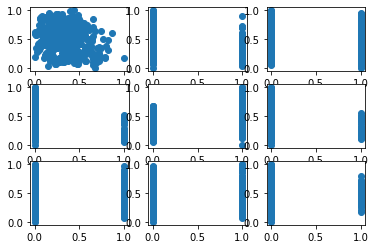

In [577]:
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3)
ax1.scatter(X_train['windspeed'], y_train)
ax2.scatter(X_train['spring'], y_train)
ax3.scatter(X_train['workingday'], y_train)
ax4.scatter(X_train['Jan'], y_train)
ax5.scatter(X_train[2019], y_train)
ax6.scatter(X_train['Feb'], y_train)
ax7.scatter(X_train['Misty'], y_train)
ax8.scatter(X_train['weekday_6'], y_train)
ax9.scatter(X_train['Nov'], y_train)
plt.show()

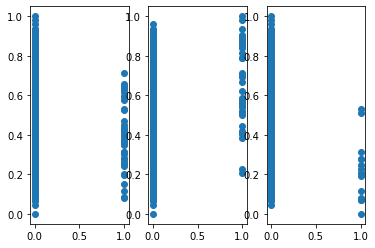

In [578]:
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3)
ax1.scatter(X_train['Dec'], y_train)
ax2.scatter(X_train['Sep'], y_train)
ax3.scatter(X_train['Light Snow'], y_train)
plt.show()

From the scatter plots above, we can observe a linear relationship between the independent and dependent variables.

### 2. Normality of the residuals:

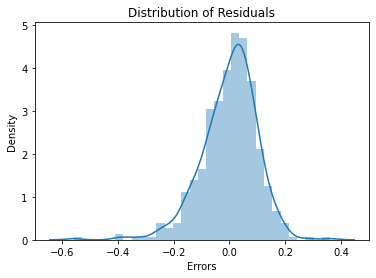

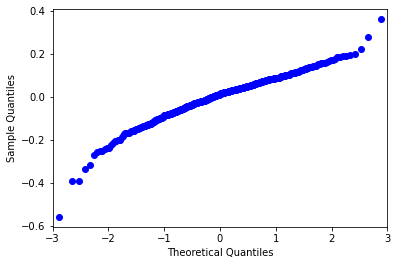

In [579]:
residuals = y_train-y_train_pred
sns.distplot(residuals)
plt.title('Distribution of Residuals')
plt.xlabel('Errors')
sm.qqplot(residuals)
plt.show()

**Observation:** From the above diagrams, we can see a normal distribution and straight line in qqplot.

### 3. No or little Multicollinearity:

In [580]:
{X15.columns[i]: variance_inflation_factor(X15.values, i) for i in range(1, X15.shape[1])}

{'windspeed': 3.924612152274107,
 'spring': 3.655663744359979,
 'summer': 1.7897990399820858,
 'Light Snow': 1.0731624472899284,
 'Misty': 1.5439974174358926,
 2019: 1.8692280811234732,
 'Dec': 1.2112048798101982,
 'Feb': 1.8370200027355414,
 'Jan': 2.13074082217179,
 'Nov': 1.2217089966596137,
 'Sep': 1.2022948332833794,
 'weekday_6': 1.5411281520990507}

**Observation:** There is some collinearity between the variables which can impact our prediction. But the VIF values are mostly below 5.

### 4. Homoscedasticity:
Error is constant along values of the dependent variable.

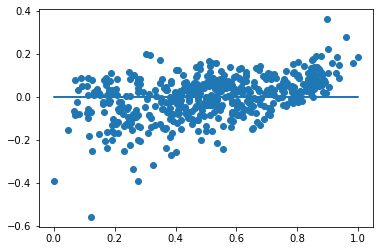

In [581]:
plt.scatter(y_train, residuals)
plt.plot(y_train, [0]*len(y_train))
plt.show()

**Observations:** Mostly there is constant deviation from the zero-line with 2 outliers in the bottom.

### 5. All independent variables are uncorrelated with error terms:

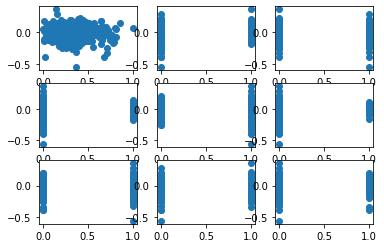

In [582]:
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3)
ax1.scatter(X_train['windspeed'], residuals)
ax2.scatter(X_train['spring'], residuals)
ax3.scatter(X_train['workingday'], residuals)
ax4.scatter(X_train['Jan'], residuals)
ax5.scatter(X_train[2019], residuals)
ax6.scatter(X_train['Feb'], residuals)
ax7.scatter(X_train['Misty'], residuals)
ax8.scatter(X_train['weekday_6'], residuals)
ax9.scatter(X_train['Nov'], residuals)
plt.show()

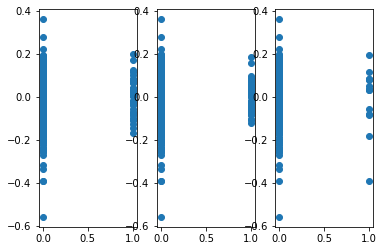

In [583]:
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3)
ax1.scatter(X_train['Dec'], residuals)
ax2.scatter(X_train['Sep'], residuals)
ax3.scatter(X_train['Light Snow'], residuals)
plt.show()

**Observations:** We can observe low correlation between independent variables and residuals.

### 6. Observations of the error terms are uncorrelated with each other:
 whether there is a correlation inside the observations of the error term

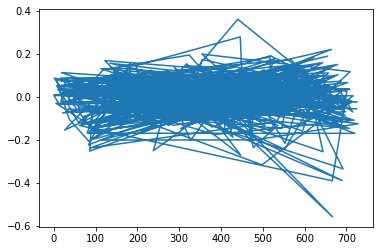

In [584]:
plt.plot(residuals.index, residuals)
plt.show()

**Observations:** The graph produces a zig-zag pattern.

## Step 7: Residual Analysis:

In [585]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.789168
426    0.516771
728    0.328696
482    0.682592
111    0.391823
         ...   
578    0.804163
53     0.277732
350    0.296859
79     0.363031
520    0.641740
Length: 510, dtype: float64

Text(0, 0.5, 'Density')

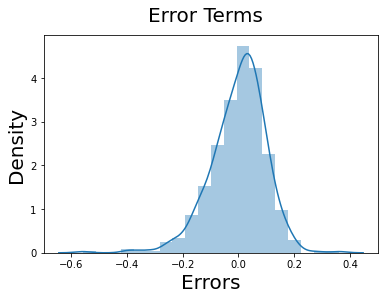

In [586]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)

**Observations:** We can see that the residues (yi-y) follows almost a normal distribution with mean equals 0.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [587]:
#create a list of numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

# Apply transform on training data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [588]:
df_test.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [589]:
y_test = df_test.pop('cnt')
X_test = df_test

In [590]:
X_test_new = X_test[X15.columns]

In [591]:
# add a constant
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,workingday,windspeed,spring,summer,Light Snow,Misty,2019,Dec,Feb,Jan,Nov,Sep,weekday_6
184,1.0,0,0.084219,0,0,0,1,0,0,0,0,0,0,0
535,1.0,1,0.153728,0,1,0,0,1,0,0,0,0,0,0
299,1.0,1,0.334206,0,0,0,1,0,0,0,0,0,0,0
221,1.0,1,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,1.0,1,0.537414,0,1,0,0,0,0,0,0,0,0,0


In [592]:
y_test_pred = lr_model.predict(X_test_sm)

In [593]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_true=y_test ,y_pred=y_test_pred)
r_squared

0.7935537378328232

In [594]:
r_squared = r2_score(y_true=y_train ,y_pred=y_train_pred)
r_squared

0.804441544583194

Since the r-squared values of train and test datasets are in comparable range and above 0.75, we can say it is a good Linear Regression model.

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

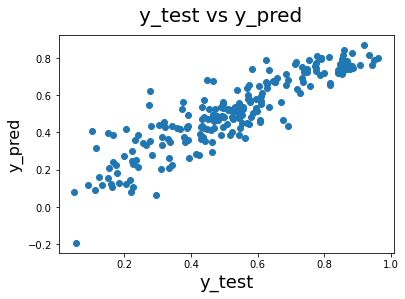

In [595]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

The equation obtained for best fitted line is:


### Conclusion:

The variables dependent for generating the prediction of bike sharing are:
- workingday
- windspeed
- spring
- summer
- Light Snow
- Misty
- 2019
- Dec
- Feb
- Jan
- Nov        
- Sep  
- weekday_6